In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import glob
import keras
from functools import reduce

Using TensorFlow backend.
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//miniconda3/envs/PTSD/lib/python3.7/site-packages/tenso

In [2]:
frame1=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/HR Features/HR Features_dataframe.csv')

In [3]:
frame2=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/Linear Accerelation Features/Linear Accerelation Features_dataframe.csv')

In [4]:
frame3=pd.read_csv('/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/Angular Accerelation Features/Angular Accerelation Features_dataframe.csv')

In [5]:
result = pd.merge(frame1,frame2,on=["windowno","participant", 'ptsd_moment'])
frame= pd.merge(result,frame3,on=["windowno","participant", 'ptsd_moment'])

In [6]:
frame.to_csv (r'/Users/mahnooshsadeghi/Desktop/PTSD/PTSD Data/All Features/All Features_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [7]:
frame

,windowno,hrmean,hrmin,hrmax,hrsd,ptsd_moment,participant,hrrange,linaccmean,linaccmin,...,acc_zmin,acc_xmax,acc_ymax,acc_zmax,acc_xsd,acc_ysd,acc_zsd,acc_xrange,acc_yrange,acc_zrange
0,2914,66.708347,62.0,73.0,3.040741,1.0,13,11.0,0.348882,0.217425,...,6.919243,5.707777,5.640739,9.809045,1.861203,1.086771,0.560615,4.946421,5.111621,2.889802
1,2915,71.868832,64.0,80.0,4.653403,1.0,13,16.0,0.806669,0.123008,...,0.636858,7.386112,10.220847,9.885658,2.080554,3.371106,3.236376,7.046136,9.303867,9.248801
2,2917,85.688151,82.0,91.0,2.840909,1.0,13,9.0,2.514998,0.160625,...,0.495600,11.070788,10.273519,6.069301,3.759313,3.459381,1.228866,10.498574,9.588777,5.573701
3,2918,88.736465,85.0,92.0,2.299090,1.0,13,7.0,2.040820,0.148323,...,0.509965,10.192116,10.330980,9.856929,3.415119,3.281564,3.509966,9.940725,9.742007,9.346964
4,2922,84.311374,77.0,91.0,4.667418,0.0,13,14.0,2.523618,0.333024,...,0.519542,9.770737,10.041282,7.189788,3.292521,2.005847,2.147173,9.418790,7.886500,6.670246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,10624,62.202333,59.0,66.0,2.620253,0.0,3,7.0,0.239104,0.143193,...,2.925715,9.653421,0.675165,2.940080,0.002215,0.004644,0.002972,0.009576,0.019154,0.014365
13340,10625,63.031590,58.0,67.0,2.574690,0.0,3,9.0,0.209354,0.117786,...,2.925715,9.653421,0.679953,2.935291,0.002491,0.003073,0.002202,0.009576,0.009577,0.009577
13341,11159,110.224178,105.0,113.0,2.229094,0.0,3,8.0,2.274762,0.271582,...,0.375890,8.786720,10.477027,8.916007,3.077231,2.257510,2.534541,8.621520,8.599973,8.540117
13342,11413,95.140097,91.0,98.0,2.525024,0.0,3,7.0,1.843623,0.126336,...,0.732626,8.559271,8.956709,9.284714,2.655217,1.988869,2.832968,8.434773,6.797139,8.552088


In [8]:
frame.head()

,windowno,hrmean,hrmin,hrmax,hrsd,ptsd_moment,participant,hrrange,linaccmean,linaccmin,...,acc_zmin,acc_xmax,acc_ymax,acc_zmax,acc_xsd,acc_ysd,acc_zsd,acc_xrange,acc_yrange,acc_zrange
0,2914,66.708347,62.0,73.0,3.040741,1.0,13,11.0,0.348882,0.217425,...,6.919243,5.707777,5.640739,9.809045,1.861203,1.086771,0.560615,4.946421,5.111621,2.889802
1,2915,71.868832,64.0,80.0,4.653403,1.0,13,16.0,0.806669,0.123008,...,0.636858,7.386112,10.220847,9.885658,2.080554,3.371106,3.236376,7.046136,9.303867,9.248801
2,2917,85.688151,82.0,91.0,2.840909,1.0,13,9.0,2.514998,0.160625,...,0.495600,11.070788,10.273519,6.069301,3.759313,3.459381,1.228866,10.498574,9.588777,5.573701
3,2918,88.736465,85.0,92.0,2.299090,1.0,13,7.0,2.040820,0.148323,...,0.509965,10.192116,10.330980,9.856929,3.415119,3.281564,3.509966,9.940725,9.742007,9.346964
4,2922,84.311374,77.0,91.0,4.667418,0.0,13,14.0,2.523618,0.333024,...,0.519542,9.770737,10.041282,7.189788,3.292521,2.005847,2.147173,9.418790,7.886500,6.670246


In [9]:
count_class_0, count_class_1 = frame.ptsd_moment.value_counts()

In [10]:
count_class_1

512

In [11]:
frame=frame.dropna()

In [12]:
X= frame[['acc_x','acc_y','acc_z','acc_xmin','acc_ymin',
          'acc_zmin','acc_xmax','acc_ymax','acc_zmax','acc_xsd',
          'acc_ysd','acc_zsd','acc_xrange','acc_yrange','acc_zrange',
          'linaccmean','linaccmin','linaccmax','linaccsd', 'linear_accel_x',
          'linear_accel_y','linear_accel_z','linaccrange',
          'hrmax', 'hrmean','hrmin','hrrange','hrsd']]
#X= frameunder[['acc_x','acc_y','acc_z','linear_accel_x','linear_accel_y','linear_accel_z','linacc','hrmax', 'hrmean','hrmin','hrrange','hrsd']]
y= frame[['ptsd_moment']]

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros = RandomOverSampler(random_state=1)

In [15]:
X_resampled, y_resampled = ros.fit_resample(X, y)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

In [17]:
import xgboost

In [18]:
from xgboost import XGBClassifier

In [19]:
clf= XGBClassifier ()

In [20]:
feature_names =['acc_x','acc_y','acc_z','acc_xmin','acc_ymin',
          'acc_zmin','acc_xmax','acc_ymax','acc_zmax','acc_xsd',
          'acc_ysd','acc_zsd','acc_xrange','acc_yrange','acc_zrange',
          'linaccmean','linaccmin','linaccmax','linaccsd', 'linear_accel_x',
          'linear_accel_y','linear_accel_z','linaccrange',
          'hrmax', 'hrmean','hrmin','hrrange','hrsd']

In [21]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
from sklearn import metrics


predictions=clf.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[3056  791]
 [ 510 3322]]


In [23]:
Confusion = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), 
                         index=['NO PTSD','PTSD'], 
                         columns=['NO PTSD','PTSD'])
Confusion

accuracy = accuracy_score(y_test, predictions)
accuracy

0.8305768980335981

In [24]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      3847
         1.0       0.81      0.87      0.84      3832

    accuracy                           0.83      7679
   macro avg       0.83      0.83      0.83      7679
weighted avg       0.83      0.83      0.83      7679



In [25]:
#Applying Kfold cross validation
from sklearn.model_selection import cross_val_score

In [26]:
accuracies = cross_val_score(clf, X= X_train, y=y_train, cv=10)

In [27]:
accuracies

array([0.81148912, 0.84263393, 0.83928571, 0.82421875, 0.83537946,
       0.82700893, 0.82970408, 0.83975433, 0.83193747, 0.83417085])

In [28]:
#meean accuracy
accuracies.mean()

0.8315582632588242

In [29]:
#good standard deviation
accuracies.std()

0.008671237373325626

In [30]:
from sklearn.metrics import auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=2)

//miniconda3/envs/PTSD/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [31]:
y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]
import matplotlib.pyplot as plt

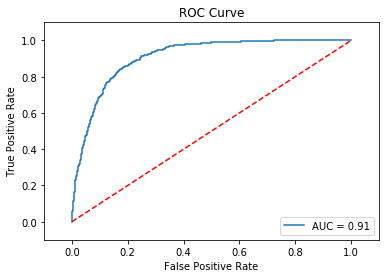

In [32]:
# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
#It either does plot show ot plot save if you wanna save the plot make sure you don't execute plt show
#plt.show()
plt.savefig('Xgboost.png', dpi=300)

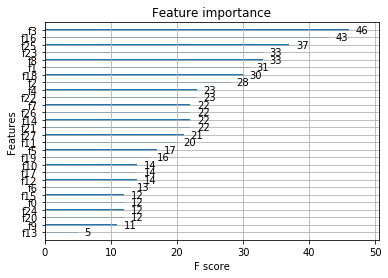

In [33]:
# plot feature importance
from xgboost import plot_importance
plot_importance(clf)
#plt.show()
plt.savefig('FeatureImportanceXgboost.png', dpi=200)

In [34]:
frame

,windowno,hrmean,hrmin,hrmax,hrsd,ptsd_moment,participant,hrrange,linaccmean,linaccmin,...,acc_zmin,acc_xmax,acc_ymax,acc_zmax,acc_xsd,acc_ysd,acc_zsd,acc_xrange,acc_yrange,acc_zrange
0,2914,66.708347,62.0,73.0,3.040741,1.0,13,11.0,0.348882,0.217425,...,6.919243,5.707777,5.640739,9.809045,1.861203,1.086771,0.560615,4.946421,5.111621,2.889802
1,2915,71.868832,64.0,80.0,4.653403,1.0,13,16.0,0.806669,0.123008,...,0.636858,7.386112,10.220847,9.885658,2.080554,3.371106,3.236376,7.046136,9.303867,9.248801
2,2917,85.688151,82.0,91.0,2.840909,1.0,13,9.0,2.514998,0.160625,...,0.495600,11.070788,10.273519,6.069301,3.759313,3.459381,1.228866,10.498574,9.588777,5.573701
3,2918,88.736465,85.0,92.0,2.299090,1.0,13,7.0,2.040820,0.148323,...,0.509965,10.192116,10.330980,9.856929,3.415119,3.281564,3.509966,9.940725,9.742007,9.346964
4,2922,84.311374,77.0,91.0,4.667418,0.0,13,14.0,2.523618,0.333024,...,0.519542,9.770737,10.041282,7.189788,3.292521,2.005847,2.147173,9.418790,7.886500,6.670246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,10624,62.202333,59.0,66.0,2.620253,0.0,3,7.0,0.239104,0.143193,...,2.925715,9.653421,0.675165,2.940080,0.002215,0.004644,0.002972,0.009576,0.019154,0.014365
13340,10625,63.031590,58.0,67.0,2.574690,0.0,3,9.0,0.209354,0.117786,...,2.925715,9.653421,0.679953,2.935291,0.002491,0.003073,0.002202,0.009576,0.009577,0.009577
13341,11159,110.224178,105.0,113.0,2.229094,0.0,3,8.0,2.274762,0.271582,...,0.375890,8.786720,10.477027,8.916007,3.077231,2.257510,2.534541,8.621520,8.599973,8.540117
13342,11413,95.140097,91.0,98.0,2.525024,0.0,3,7.0,1.843623,0.126336,...,0.732626,8.559271,8.956709,9.284714,2.655217,1.988869,2.832968,8.434773,6.797139,8.552088
